<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/1_DiscreteTimeSignals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Discrete Time Signals

In [7]:
import numpy as np
import matplotlib.pyplot as plt





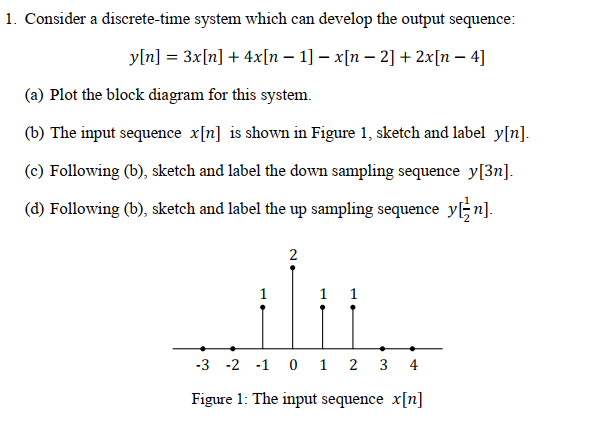

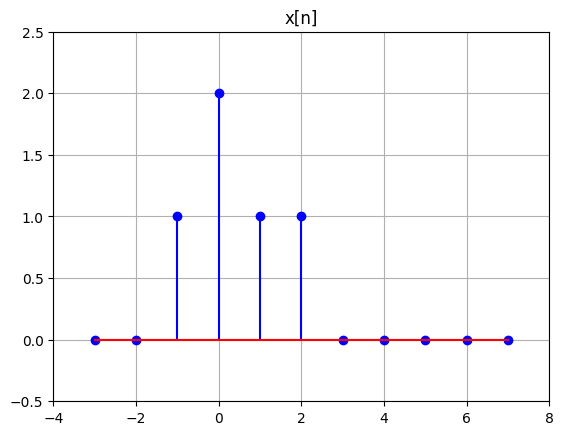

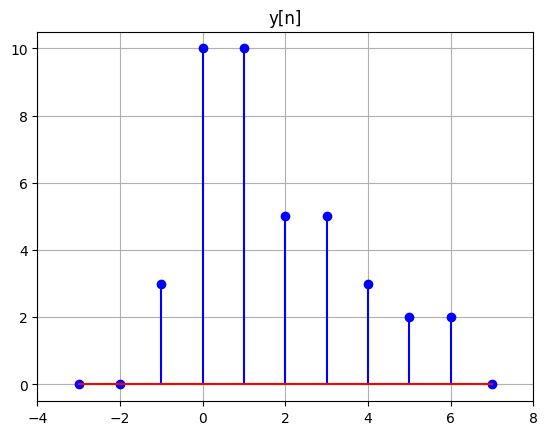

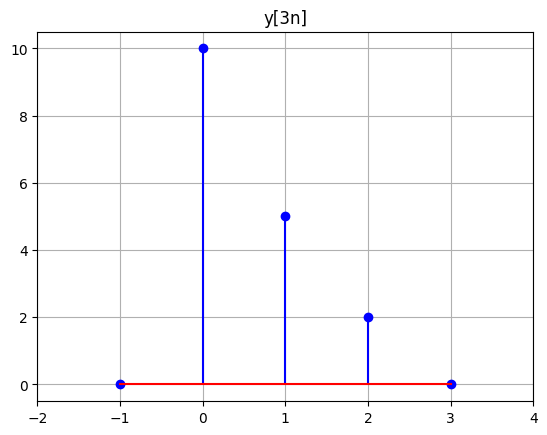

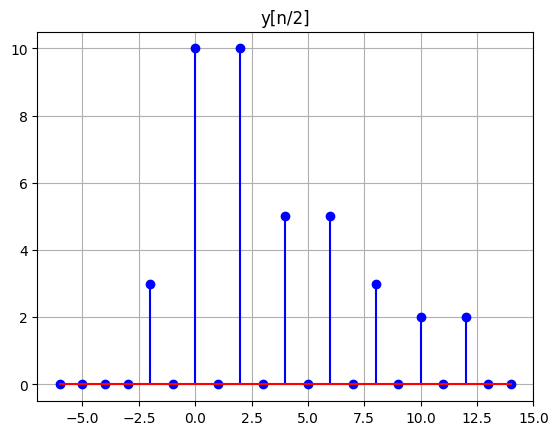

In [8]:
# Problem 1
n = np.array([-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([0, 0, 3, 10, 10, 5, 5, 3, 2, 2, 0])
x = np.array([0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0])

# Plot x[n]
plt.figure()
plt.stem(n, x, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.ylim([-0.5, 2.5])
plt.xlim([-4, 8])
plt.title("x[n]")
plt.grid(True)
plt.show()

# Plot y[n]
plt.figure()
plt.stem(n, y, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.ylim([-0.5, 10.5])
plt.xlim([-4, 8])
plt.title("y[n]")
plt.grid(True)
plt.show()

# Plot y[3n]
n2 = np.array([-1, 0, 1, 2, 3])
y2 = np.array([0, 10, 5, 2, 0])
plt.figure()
plt.stem(n2, y2, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.ylim([-0.5, 10.5])
plt.xlim([-2, 4])
plt.title("y[3n]")
plt.grid(True)
plt.show()

# Plot y[n/2]
n3 = np.array([-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
y3 = np.array([0, 0, 0, 0, 3, 0, 10, 0, 10, 0, 5, 0, 5, 0, 3, 0, 2, 0, 2, 0, 0])
plt.figure()
plt.stem(n3, y3, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.ylim([-0.5, 10.5])
plt.xlim([-7, 15])
plt.title("y[n/2]")
plt.grid(True)
plt.show()


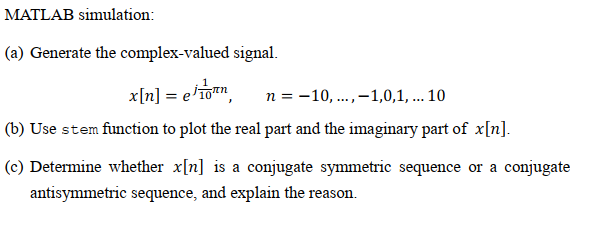

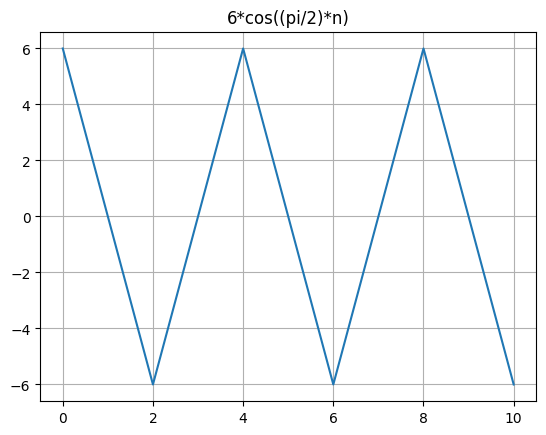

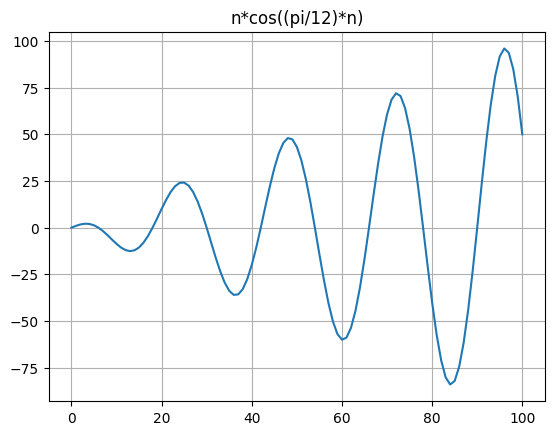

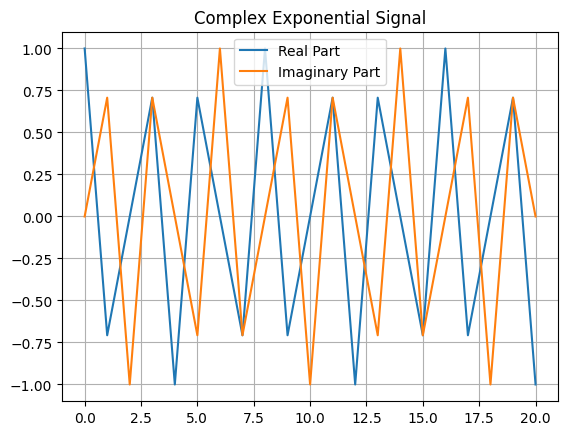

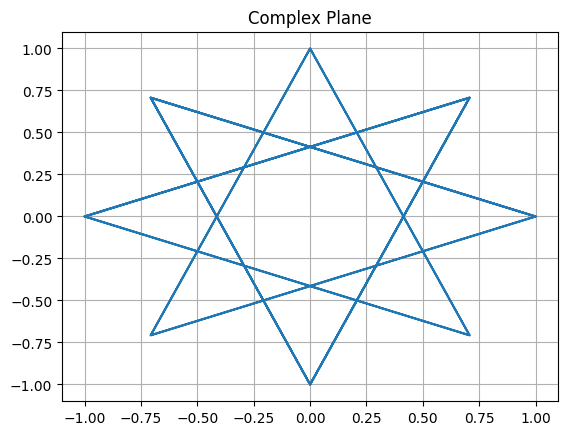

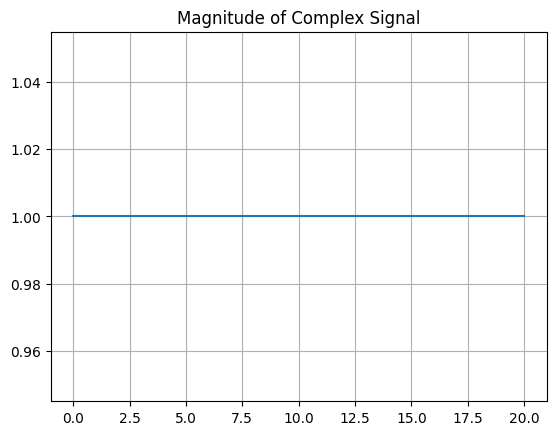

In [9]:
# Program 2
# Plot cos signal
n5 = np.arange(0, 11)
y5 = 6 * np.cos((np.pi / 2) * n5)
plt.figure()
plt.plot(n5, y5)
plt.grid(True)
plt.title("6*cos((pi/2)*n)")
plt.show()

# Plot linear modulated signal
n6 = np.arange(0, 101)
y6 = n6 * np.cos((np.pi / 12) * n6)
plt.figure()
plt.plot(n6, y6)
plt.grid(True)
plt.title("n*cos((pi/12)*n)")
plt.show()

# Complex exponential
n7 = np.arange(0, 21)
y7 = np.exp(1j * (3 / 4) * np.pi * n7)
plt.figure()
plt.plot(n7, np.real(y7), label="Real Part")
plt.plot(n7, np.imag(y7), label="Imaginary Part")
plt.legend()
plt.grid(True)
plt.title("Complex Exponential Signal")
plt.show()

# plt.figure()
# plt.plot(np.real(y7), np.imag(y7))
# plt.grid(True)
# plt.title("Complex Plane")
# plt.show()

# plt.figure()
# plt.plot(n7, np.abs(y7))
# plt.grid(True)
# plt.title("Magnitude of Complex Signal")
# plt.show()


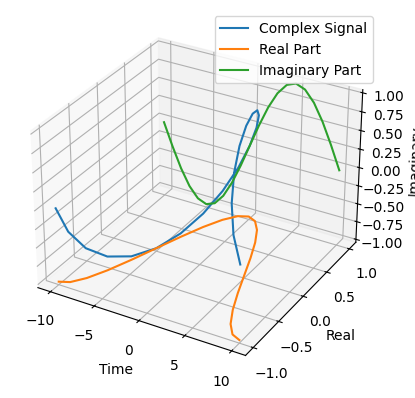

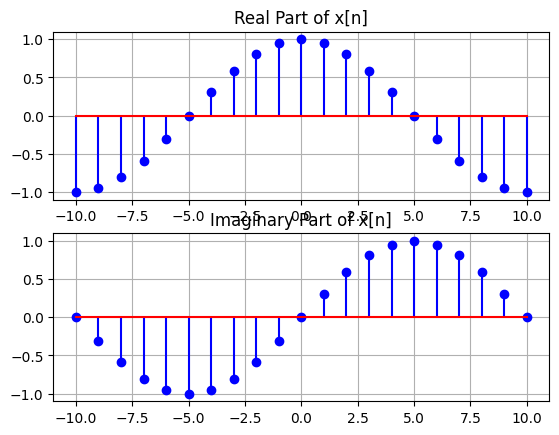

In [10]:
# Problem 3
n4 = np.arange(-10, 11)
s = np.exp(1j * (1 / 10) * np.pi * n4)
Res = np.real(s)
Ims = np.imag(s)

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(n4, Res, Ims, label="Complex Signal")
ax.plot(n4, Res, np.zeros_like(Res)-1, label="Real Part")
ax.plot(n4, np.zeros_like(Ims)+1, Ims, label="Imaginary Part")
ax.set_xlabel("Time")
ax.set_ylabel("Real")
ax.set_zlabel("Imaginary")
ax.legend()
plt.grid(True)
plt.show()

# Separate Real and Imaginary Parts
plt.figure()
plt.subplot(2, 1, 1)
plt.stem(n4, Res, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.title("Real Part of x[n]")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(n4, Ims, linefmt="b-", markerfmt="bo", basefmt="r-")
plt.title("Imaginary Part of x[n]")
plt.grid(True)
plt.show()
